In [27]:

import pandas as pd
df = pd.read_csv('DataSets/car_evaluation.csv')
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,Bad
1,vhigh,vhigh,2,2,small,med,Bad
2,vhigh,vhigh,2,2,small,high,Bad
3,vhigh,vhigh,2,2,med,low,Bad
4,vhigh,vhigh,2,2,med,med,Bad


In [28]:

df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,Bad
1,vhigh,vhigh,2,2,small,med,Bad
2,vhigh,vhigh,2,2,small,high,Bad
3,vhigh,vhigh,2,2,med,low,Bad
4,vhigh,vhigh,2,2,med,med,Bad


In [29]:
df.isnull().values.any()

False

In [30]:

df['class'].replace(to_replace=[['Bad'], ['Good']],value=[0,1],inplace=True)
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,0
1,vhigh,vhigh,2,2,small,med,0
2,vhigh,vhigh,2,2,small,high,0
3,vhigh,vhigh,2,2,med,low,0
4,vhigh,vhigh,2,2,med,med,0


In [31]:
def ImbalancePercentage(df):
  bad_count,good_count= 0.0,0.0
  for i in df['class']:
    if i==0:
      bad_count+=1
    else:
      good_count+=1
  sum=bad_count+good_count
  bad_percentage = bad_count/sum
  good_percentage = good_count/sum
  return (bad_percentage-good_percentage)

In [32]:

imbalance=ImbalancePercentage(df)*100.0
print(imbalance)
if imbalance > 30:
  print("Imablance Dataset")
else:
  print("Balance Dataset")

40.0462962962963
Imablance Dataset


In [33]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
categoricals = ["buying",'maint','doors','persons','lug_boot',"safety"]
for i in categoricals:
    df[i] = le.fit_transform(df[i])
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,0,0,2,1,0
1,3,3,0,0,2,2,0
2,3,3,0,0,2,0,0
3,3,3,0,0,1,1,0
4,3,3,0,0,1,2,0


In [34]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('class', axis=1), df['class'], test_size=0.2)
X_train,y_train

(      buying  maint  doors  persons  lug_boot  safety
 118        3      0      0        1         2       2
 658        0      2      0        1         2       2
 1147       2      2      2        1         1       2
 740        0      2      3        1         2       0
 608        0      0      2        1         1       0
 ...      ...    ...    ...      ...       ...     ...
 1130       2      2      1        2         1       0
 1329       1      3      1        0         0       1
 434        0      3      0        0         2       0
 1016       2      0      1        1         0       0
 427        3      1      3        2         1       2
 
 [1382 rows x 6 columns],
 118     0
 658     0
 1147    1
 740     1
 608     1
        ..
 1130    1
 1329    0
 434     0
 1016    1
 427     1
 Name: class, Length: 1382, dtype: int64)

In [35]:
print(type(X_train))

<class 'pandas.core.frame.DataFrame'>


In [36]:
training_data=X_train.assign(result=y_train)
training_data

,buying,maint,doors,persons,lug_boot,safety,result
118,3,0,0,1,2,2,0
658,0,2,0,1,2,2,0
1147,2,2,2,1,1,2,1
740,0,2,3,1,2,0,1
608,0,0,2,1,1,0,1
...,...,...,...,...,...,...,...
1130,2,2,1,2,1,0,1
1329,1,3,1,0,0,1,0
434,0,3,0,0,2,0,0
1016,2,0,1,1,0,0,1


In [37]:
testing_data=X_test.assign(result=y_test)
testing_data

,buying,maint,doors,persons,lug_boot,safety,result
868,2,3,0,0,1,2,0
224,3,2,0,0,0,0,0
801,0,1,1,2,2,1,0
1496,1,0,3,1,2,0,1
1461,1,0,2,0,1,1,0
...,...,...,...,...,...,...,...
850,0,1,3,1,1,2,1
199,3,0,3,1,2,2,0
1523,1,2,0,1,2,0,1
630,0,0,3,1,2,1,0


In [38]:
testing_data.to_csv("DataSets/car_evaluation_test.csv")

In [39]:
class_minority_df=training_data[training_data['result']==1]
class_minority_df.shape

(424, 7)

In [40]:
class_minority_df=training_data[training_data['result']==1]
class_minority_df.head()

,buying,maint,doors,persons,lug_boot,safety,result
1147,2,2,2,1,1,2,1
740,0,2,3,1,2,0,1
608,0,0,2,1,1,0,1
1468,1,0,2,1,2,2,1
1391,1,3,3,1,1,0,1


Text(0, 0.5, 'Frequency')

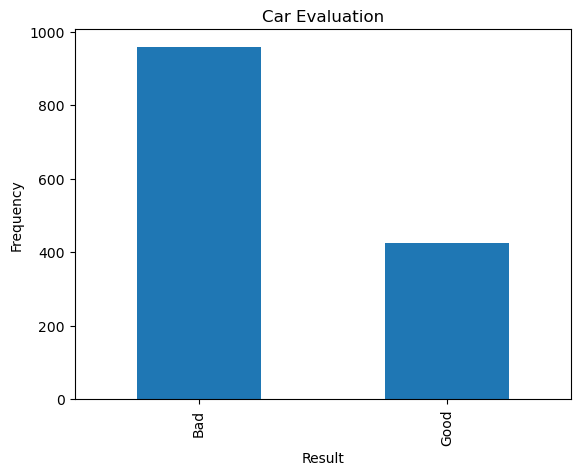

In [41]:

import matplotlib.pyplot as plt
import seaborn as sns



count_classes = pd.value_counts(training_data['result'], sort = True)

count_classes.plot(kind = 'bar')

plt.title("Car Evaluation")
LABELS = ["Bad", "Good"]
plt.xticks(range(2), LABELS)

plt.xlabel("Result")

plt.ylabel("Frequency")

In [42]:
# print(training_data.buying.unique())
# training_data['buying'].replace(to_replace=[['vhigh'], ['med'], ['low'], ['high']],value=[3,1,0,2],inplace=True)

In [43]:
# print(training_data.maint.unique())
# training_data['maint'].replace(to_replace=[['vhigh'], ['med'], ['low'], ['high']],value=[3,1,0,2],inplace=True)

In [44]:
# print(training_data.doors.unique())
# training_data['doors'].replace(to_replace=[['2'], ['5more'], ['3'], ['4']],value=[2,5,3,4],inplace=True)

In [45]:
# print(training_data.lug_boot.unique())
# training_data['lug_boot'].replace(to_replace=[['small'], ['med'],  ['big']],value=[0,1,2],inplace=True)

In [46]:
# print(training_data.persons.unique())
# training_data['persons'].replace(to_replace=[['2'], ['4'],  ['more']],value=[2,4,6],inplace=True)

In [47]:
# print(training_data.safety.unique())
# training_data['safety'].replace(to_replace=[['high'], ['med'], ['low']],value=[2,1,0],inplace=True)

In [48]:
class_majority_df=training_data[training_data['result']==0]
class_majority_df.head()

,buying,maint,doors,persons,lug_boot,safety,result
118,3,0,0,1,2,2,0
658,0,2,0,1,2,2,0
104,3,3,3,2,1,0,0
960,2,3,3,1,0,1,0
482,0,3,1,2,1,0,0


In [49]:
class_minority_df=training_data[training_data['result']==1]
print(class_minority_df.shape)
class_minority_df.head()

(424, 7)


,buying,maint,doors,persons,lug_boot,safety,result
1147,2,2,2,1,1,2,1
740,0,2,3,1,2,0,1
608,0,0,2,1,1,0,1
1468,1,0,2,1,2,2,1
1391,1,3,3,1,1,0,1


In [50]:
class_majority_df.to_csv("DataSets/car_evaluation_majority.csv")



In [51]:
class_minority_df.to_csv("DataSets/car_evaluation_minority.csv")